# League of Legends Match Result - Logistic Regression

A Logistic Regression model can be a useful method of predicting a binomial variable, e.g. in a bank, whether a customer will default a loan. 

For this project, I will obtain data from the Riot Games API on a professional player called Rekkles. The data will consist of the his match stats for his most recent 100 games (as of 12:29 BST 27/06/2020).

This data will be used to explore the relationship between the in-game stats and the match outcome (win/loss).

I have included the process for extracting the data below. In order to follow along, you will need to access your account on https://developer.riotgames.com/ and generate your own Development API Key.
I will not run the code in this document as I would need to include my personal API key, but I will provide the generated data set in the repository. 

If you are only interested in the data analysis, scroll past this section and work with the data in the file. 

## Acquiring the Data

In [ ]:
import requests
import json
import os
import time

# Functions to make API calls to the Riot Games API. 


def get_summoner(summoner_name,api_key,create_file = True):
	# Function to retreive information on summoner and create a readable file JSON. 
	
	dirName = f'riot_games/summoner/{summoner_name}/'
	if not os.path.exists(dirName):
		# Creat the file path and get the summoner info from Riot API.
		os.mkdir(dirName)
		print("Directory " , dirName ,  " Created ") 


	url = f'https://euw1.api.riotgames.com/lol/summoner/v4/summoners/by-name/{summoner_name}'
	headers = {
	    "Accept-Language": "en-GB,en-US;q=0.9,en;q=0.8",
	    "Accept-Charset": "application/x-www-form-urlencoded; charset=UTF-8",
	    "Origin": "https://developer.riotgames.com",
	    "X-Riot-Token": api_key
	}
	r=requests.get(url, headers=headers)
	print(f"Summoner request for {summoner_name}\tStatus code: {r.status_code}")
	summoner_dict = r.json()
	# If we want to create a file, then it creates a file. 
	if create_file == True:
		readable_file = f"riot_games/summoner/{summoner_name}/{summoner_dict['name']}.json"
		with open(readable_file, 'w') as f:
			json.dump(summoner_dict, f, indent=4)


	return summoner_dict




	return summoner_dict

def get_matchlist(summoner_name,account_id,api_key,create_file = True):
	# Function to retreive information on summoner and create a readable file JSON. 
	
	url = f'https://euw1.api.riotgames.com/lol/match/v4/matchlists/by-account/{account_id}'
	headers = {
	    "Accept-Language": "en-GB,en-US;q=0.9,en;q=0.8",
	    "Accept-Charset": "application/x-www-form-urlencoded; charset=UTF-8",
	    "Origin": "https://developer.riotgames.com",
	    "X-Riot-Token": api_key
	}
	r=requests.get(url, headers=headers)
	print(f"Matchlist request for {account_id}\tStatus code: {r.status_code}")
	summoner_matchlist = r.json()

	# If we want to create a file, then it creates a file. 
	if create_file == True:
		readable_file_matchlist = f"riot_games/summoner/{summoner_name}/{summoner_name}_matchlist.json"
		with open(readable_file_matchlist, 'w') as f:
			json.dump(summoner_matchlist, f, indent=4)

	return summoner_matchlist


def get_match(match_id, api_key):
	# Function to get match information from a match Id.
	url= f"https://euw1.api.riotgames.com/lol/match/v4/matches/{match_id}"
	headers = {
    "Accept-Language": "en-GB,en-US;q=0.9,en;q=0.8",
    "Accept-Charset": "application/x-www-form-urlencoded; charset=UTF-8",
    "Origin": "https://developer.riotgames.com",
    "X-Riot-Token": api_key
	}
	r=requests.get(url, headers=headers)
	print(f"Match request for {match_id}\tStatus code: {r.status_code}")

	match_data = r.json()



	return match_data

These functions issue a call to the Riot API and request the information we are after. If appropriate, they store the information in an easy to read JSON file. 


In [ ]:
summoner_name = 'Robert Chase' #Rekkles' IGN is Robert Chase.
api_key="" # Input your API key here.

summoner_dict = get_summoner(summoner_name,api_key)
get_matchlist(summoner_name,summoner_dict['accountId'],api_key)
time.sleep(120) # We set the program to wait 2 mintues here as the Riot API has an 100 get request
#limit per 2 minutes. We need all 100 requests in order to obtain the data for 100 games.

# Establish data objects
readable_file_matchlist = f"riot_games/summoner/{summoner_name}/{summoner_name}_matchlist.json"
with open(readable_file_matchlist, 'r') as f:
	summoner_matchlist=json.load(f)

readable_file_summoner = f"riot_games/summoner/{summoner_name}/{summoner_name}.json"
with open(readable_file_summoner, 'r') as f:
	summoner_info =json.load(f)

# Extract game_ids and champions_played for specified summoner
game_ids, champions_played = [], []
for match in summoner_matchlist['matches']:
	game_ids.append(match['gameId'])
	champions_played.append(match['champion'])

Hence, we have created a list of the Game ID's for Robert Chase's last 100 games. We will now call for the stats on his last 100 games.

In [ ]:
summoner_name = summoner_info['name'] # Ensure summoner name is correctly formatted.

# Get the matchlist_info for summoner and create a file in the directory to store the matchlist data.
matchlist_info = []
dirName = f'riot_games/summoner/{summoner_name}/{summoner_name}_match_data'
if not os.path.exists(dirName):
	# Check to see if directory already exists and if not, get match info from Riot API.
	# Create target directory
	os.mkdir(dirName)
	print("Directory " , dirName ,  " Created ") 

	for game_id in game_ids:
		match_info=riotapi.get_match(game_id,api_key)
		matchlist_info.append(match_info)

	readable_file_matchlist_info = f"riot_games/summoner/{summoner_name}/{summoner_name}_match_data/matchlist_info.json"
	with open(readable_file_matchlist_info, 'w') as f:
		json.dump(matchlist_info, f, indent=4)
else:
# Else, read in the data
	print(f"Matchlist info for {summoner_name} already exists.\n")
	readable_file_matchlist_info = f"riot_games/summoner/{summoner_name}/{summoner_name}_match_data/matchlist_info.json"
	try:
        #Try to open the file in the direcetory.
		with open(readable_file_matchlist_info, 'r') as f:
			matchlist_info = json.load(f)

	except FileNotFoundError:
        #If the file does not already exist, make the requests and store the information.
		for game_id in game_ids:
			match_info=riotapi.get_match(game_id,api_key)
			matchlist_info.append(match_info)

		readable_file_matchlist_info = f"riot_games/summoner/{summoner_name}/{summoner_name}_match_data/matchlist_info.json"
		with open(readable_file_matchlist_info, 'w') as f:
			json.dump(matchlist_info, f, indent=4)

We have now obtained a data set containing all of the information on Robert Chase's last 100 games. There is a lot of information here, so I would like to simplify it. For the sake of this project, we are only interested in Robert Chase's stats, however we have data on all 10 players in each game.

In [ ]:

# Create file for specific summoner performance in last 100 games for summoner.
summoner_match_stats =[]
for match in matchlist_info:
	timestamp = match["gameCreation"]
	participant_id = ''
    
    # Here we establish which participant corresponds to the summoner of interest.
	for participant in match['participantIdentities']:
		if participant['player']['summonerName'].lower() == summoner_name.lower().strip():
			participant_id = participant['participantId']
            
    # Here we establish the summoners corresponding team. 
	if participant_id in range(1,6):
		teamId=100
		teams_index = 0
	elif participant_id in range(6,11):
		teamId=200
		teams_index = 1

    # Now we create a dictionary for each match containing the information we require.
	for participant in match['participants']:
		if participant['participantId'] == participant_id:
			summoner_match_stats.append({ 
				'gameId' : match['gameId'] ,
				'teamId' : teamId,
				'win' : match['teams'][teams_index]['win'],
				'time' : timestamp,
				'gameDuration' : match['gameDuration'] ,
				'champion_id' : participant['championId'] ,
				'stats' : participant['stats']
			})

# Finally we store the file. 
readable_file_summoner_match_stats= f"riot_games/summoner/{summoner_name}/{summoner_name}_match_data/summoner_match_stats.json"
with open(readable_file_summoner_match_stats, 'w') as f:
		json.dump(summoner_match_stats, f, indent=4)


# Data Exploration

We now have a nice starting point to begin exploring the data. To begin with, I have decided to pick out some explanatory variables that I want to experiment with. These being the lists: kills, deaths, assists, KDA, datetimestamps, champions_played and game_durations. The response variable for this analysis will be match_results with values of 0 and 1, representing losses and wins, respectively.

Note: KDA is short for KDA ratio, which is a ratio between your kills+assists and your deaths. 

   match_results      datetimestamps  champions_played  kills  deaths  \
0              0 2020-06-27 11:50:21               134      0       6   
1              1 2020-06-27 11:10:36               235      3       4   
2              1 2020-06-27 10:46:08               523      7       2   
3              1 2020-06-27 10:08:55               429      6       2   
4              0 2020-06-27 09:36:20               202      8       5   

   assists  KDA  game_durations  damage_per_minute_list  wards_placed_list  \
0        6  1.0            1386              351.991342                 11   
1       17  5.0            1890              364.857143                 39   
2        2  4.5            1079              482.647386                  7   
3       10  8.0            1375              612.696335                  7   
4        8  3.2            1470              463.795918                 10   

   total_minions_killed_list  
0                        202  
1                         44  

,champions_played,kills,deaths,assists,KDA,game_durations,damage_per_minute_list,wards_placed_list,total_minions_killed_list
match_results,,,,,,,,,
0,107.550000,3.725000,3.950000,5.650000,2.785000,1535.150000,532.893754,11.55,166.525
1,133.766667,8.466667,2.683333,10.166667,8.871667,1523.216667,822.087132,10.30,158.650


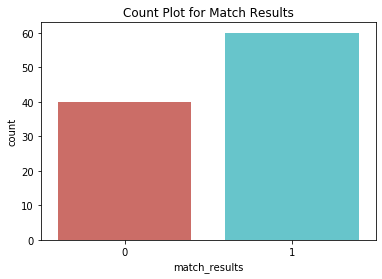

In [1]:
import json
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

summoner_name = 'Robert Chase'
summoner_match_stats_filepath = f"riot_games/summoner/{summoner_name}/{summoner_name}_match_data/summoner_match_stats.json"
with open(summoner_match_stats_filepath, 'r') as f:
	summoner_match_stats = json.load(f)


kills, deaths, assists, KDA, datetimestamps, champions_played, game_durations, match_results = [],[],[],[],[],[],[],[]
damage_per_minute_list, wards_placed_list, total_minions_killed_list = [],[],[]
for match in summoner_match_stats:
	match_kills=match['stats']['kills']
	match_deaths=match['stats']['deaths']
	match_assists= match['stats']['assists']
	champion_played = match['champion_id']
	timestamp = round(match['time']/1000)
	datetimestamp = datetime.fromtimestamp(timestamp)
	game_duration = match['gameDuration']
	damage_dealt_per_minute = match['stats']['totalDamageDealtToChampions'] / round(game_duration/60,2)
	wards_placed = match['stats']['wardsPlaced']
	total_minions_killed = match['stats']['totalMinionsKilled']
	match_result = match['stats']['win']


	champions_played.append(champion_played)
	datetimestamps.append(datetimestamp)
	kills.append(match_kills)
	deaths.append(match_deaths)
	assists.append(match_assists)
	game_durations.append(game_duration)
	damage_per_minute_list.append(damage_dealt_per_minute)
	total_minions_killed_list.append(total_minions_killed)
	wards_placed_list.append(wards_placed)
	match_results.append(match_result)
	
	try:
		KDA.append(round(((match_kills+match_assists)/match_deaths),2))
	except ZeroDivisionError:
		KDA.append(float(match_kills+match_assists))
match_results = [ 1 if result==True else 0 for result in match_results ]


df = pd.DataFrame(list(zip(match_results, datetimestamps, champions_played, kills, deaths, assists, KDA,  game_durations, damage_per_minute_list, wards_placed_list, total_minions_killed_list)),
	columns = ['match_results','datetimestamps','champions_played', 'kills', 'deaths', 'assists','KDA', 'game_durations', 'damage_per_minute_list', 'wards_placed_list', 'total_minions_killed_list'])

print(df.head())

wins, losses = df['match_results'].value_counts()
print(f"Number of Wins : {wins}")
print(f"Number of Losses : {losses}")


sns.countplot(x='match_results', data=df, palette = 'hls')
plt.title('Count Plot for Match Results')

df.groupby('match_results').mean()

Here we have created a data frame. We have 60 wins and 40 losses, which is a nice split for our classification. Looking at the mean for our different variables, it appears that in games where Rekkles won, he had higher kills, assists, KDA and damage_per_minute stat.  It also looks like he has lower deaths in matches with a win. 

Text(0.5, 1, 'Heatmap of Correlation for Variables')

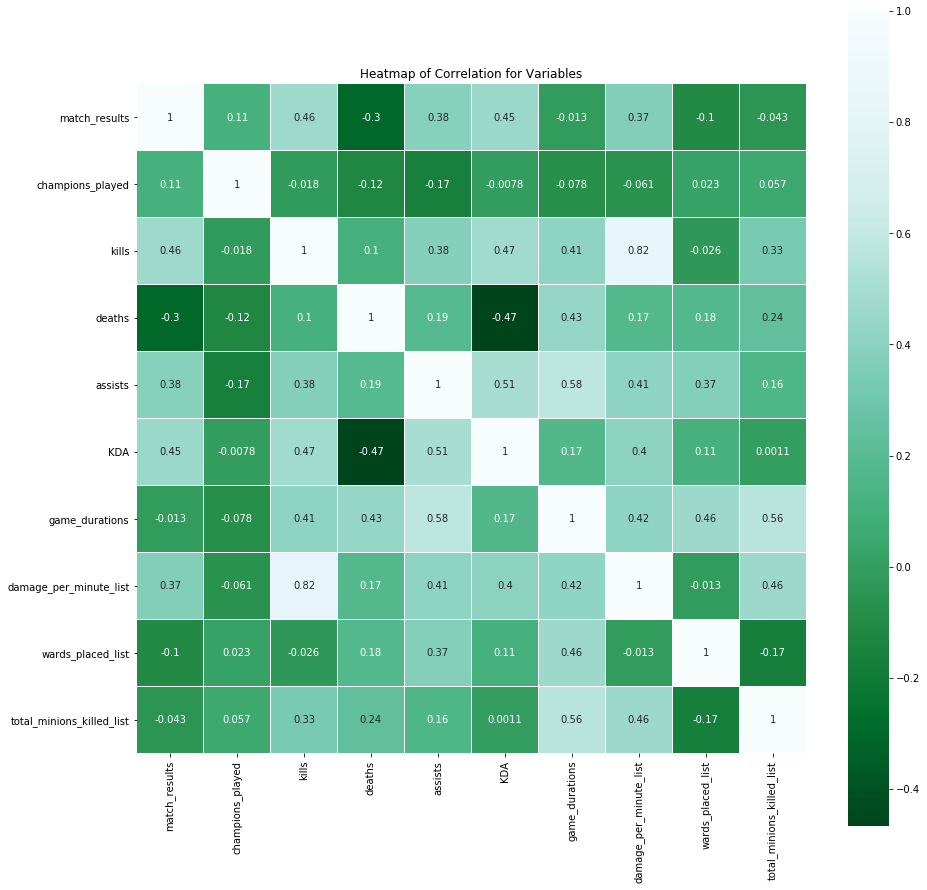

In [2]:
def correlation_visualisation(df):
	"""
	Creates a correlation plot between each of the explanatory variables.
	"""

	plt.figure(figsize=(15,15))
	sns.heatmap(df.corr(), linewidth=0.25, annot=True, square=True, cmap = "BuGn_r", linecolor = 'w')


correlation_visualisation(df)
plt.title("Heatmap of Correlation for Variables")


The above plot is a correlation heatmap for our explanatory variables. It is important to understand which variables experience collinearity, as in regression analsysis, it can lead to coefficient estimate that are relatively large in magnitude and of inappropriate direction.

Some important things to note are:

<span>&#8226;</span> Kills and damage  per minute have strong correlation and as such, we will choose one only to investiage. We will drop damage per minute as it simplifies the model.

<span>&#8226;</span> KDA has non-zero covariances with kills, deaths and assists. This is expected as the formula to derive KDA involves all three variables. This was originally included as a means to drop the kills, deaths and assists column however, it appears that this should not be the case. Kills and deaths a covariance estimate of 0.19 which suggests weak covariance, as such we will not drop deaths. Furthermore, kills does have an estimate of 0.38 for the covariance with assists however, we will keep it but make note of it. We will drop KDA. 

<span>&#8226;</span> game_durations has a correlation with all of the variables of around 0.4-0.6 and as a result, we will drop it. If we wanted to use game_duration it may be reasonable to suggest calculating each of the variables divided by time, in order to reduce some of the collinearity. 


Hence, we will drop damage per minute, KDA and gametime. I have also dropped variables champions_played and datetimestamps.


   match_results  kills  deaths  assists  wards_placed_list  \
0              0      0       6        6                 11   
1              1      3       4       17                 39   
2              1      7       2        2                  7   
3              1      6       2       10                  7   
4              0      8       5        8                 10   

   total_minions_killed_list  
0                        202  
1                         44  
2                        159  
3                        176  
4                        173  


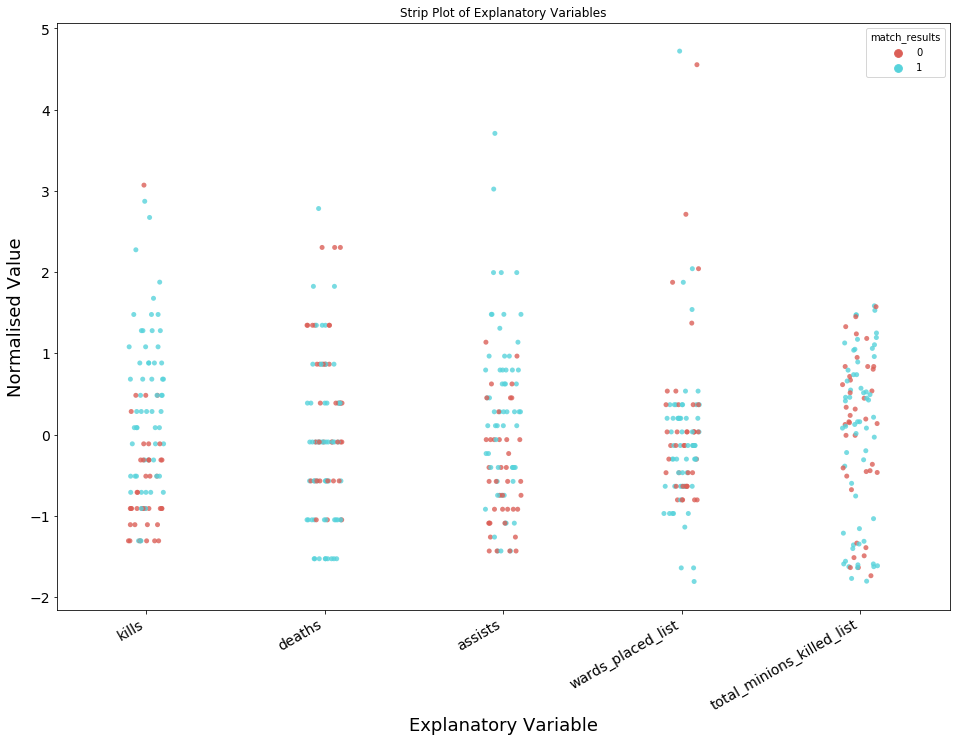

In [3]:
df=df.drop(columns=['champions_played', 'KDA', 'game_durations', 'damage_per_minute_list', 'datetimestamps'])


print(df.head())

#Now let's use a strip plot to explore the variables relationships with the match_result. 

def normalise_col(col):
	"""
	Function to normalise the data in each column.
	"""
	col = (col - col.mean())/(col.std())
	return col

def strip_plot(df):
	"""
	Produce a strip plot for the dataframe.
	"""

	fig = plt.figure(figsize=(16,12))
	df_normalised = df.copy()
	for col in df_normalised.columns[1:]:
		df_normalised[col] =normalise_col(df_normalised[col])
	
	df_normalised = pd.melt(df_normalised, value_vars = df_normalised.columns[1:], id_vars = 'match_results')
	sns.stripplot(x='variable', y='value', hue='match_results', data=df_normalised, alpha=0.8, palette = 'hls')
	plt.xlabel("Explanatory Variable", fontsize=18)
	plt.ylabel("Normalised Value", fontsize=18)
	plt.tick_params(axis='both', which= 'major', labelsize=14)
	fig.autofmt_xdate()
	plt.title("Strip Plot of Explanatory Variables")

strip_plot(df)




This strip plot presents some interesting results. We can clearly see some correlation between some of the variables and the match result.

We note that a high value for kills or assists appears to have a positive effect on winning. A low number of deaths appear to have a positive effect on winning. We also note that there is no obvious correlation between either wards_placed nor total_minions_killed with the match_result value. 

This gives us an idea of what to expect when use a logistic regression model on our data set. 


## Logistic Regression Model

In [4]:
df_final = df.copy()

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

x=df_final.loc[:, df_final.columns != 'match_results']
y=df_final.loc[:, df_final.columns =='match_results']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

logit_model=sm.Logit(y_train.astype(int),x_train.astype(float))

result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.377462
         Iterations 7
                             Results: Logit
Model:                  Logit              Pseudo R-squared:   0.443     
Dependent Variable:     match_results      AIC:                66.6192   
Date:                   2020-06-30 15:40   BIC:                78.2067   
No. Observations:       75                 Log-Likelihood:     -28.310   
Df Model:               4                  LL-Null:            -50.854   
Df Residuals:           70                 LLR p-value:        3.8118e-09
Converged:              1.0000             Scale:              1.0000    
No. Iterations:         7.0000                                           
-------------------------------------------------------------------------
                           Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
kills                      0.3364   0.12

The model we have fitted is as follows:


$$ y=\beta_{kills} x_{kills}+\beta_{deaths} x_{deaths}+\beta_{assists} x_{assists}+\beta_{wp} x_{wp}+\beta_{tmk} x_{tmk} $$


$$ y=  0.3364x_{kills}-0.5765x_{deaths}+0.3333x_{assists}-0.1003x_{wp}-0.0083x_{tmk} $$


$$ P = \frac{e^{y}}{1+e^y} $$

We calculate an estimate for the probability of a win by utilising the above formulate for y and inputting it into P. In order to clasify the predication as either a win or a loss, we simply assign anything with a value of P>0.5 as a win and anything with a value of P<0.5 as a loss. 

We note that all of the co-efficients appear to be statistically significant - this is suggested by our p-values having a size <0.05. 

The Pseudo R-squared for our model is 0.44, which suggests there is some room for improvement. This could easily be a result of our small data set. 

We can draw out some interesting conclusions from our variables. We confirm our suspicions that kills and assists both have a positive correltion with win rate and that deaths has a negative correlation with win rate. We also see that placing more wards and killing more minions seems to have a negative effect on Rekkles's chance of winning, which is very surprising. It is common knowledge that warding more gives more vision, and as a result, more knowledge to the player. As a result, you would expect an increase in win probability as you gain more vision. Furthermore, killing minions gives gold and allows your champion to become more powerful. You'd expect that increase in total minions killed would also lead to a higher winning chance. These are interesting results. 

Perhaps warding makes sense as Rekkles is an ADC, it could be that when he wards he is more likely to get caught out of position and as a result, die more often. However, our correlation plot from earlier suggests this is not the case. 

Maybe, as variables are both correlated with game duration, we have that Rekkles has a higher chance of losing when games are longer. Clearly, there are a lot more areas we could explore.

## Implementing the Model

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression(fit_intercept=False)
logreg.fit(x_train.astype(float), np.ravel(y_train))

y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print('\n', confusion_matrix)

print('\n',logreg.coef_)


Accuracy of logistic regression classifier on test set: 0.92

 [[ 9  0]
 [ 2 14]]

 [[ 0.32714618 -0.54760356  0.32437029 -0.0989552  -0.00821907]]


The confusion matrix tells us the constructed model performs well on the small training data set. It correctly identifies 23 results. It does, however, have 2 false negatives. 

This model has slightly different co-efficients to that in the above section as it is calculated in a slightly different way. As a result, our model is: 
$$ y=  0.3271x_{kills}-0.5476x_{deaths}+0.3244x_{assists}-0.0990x_{wp}-0.0082x_{tmk} $$
$$ P = \frac{e^{y}}{1+e^y} $$

              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.88      0.93        16

    accuracy                           0.92        25
   macro avg       0.91      0.94      0.92        25
weighted avg       0.93      0.92      0.92        25



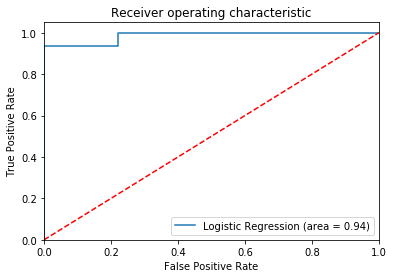

In [6]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve



logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test.values, logreg.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")




The classification report tells us that in our test data set, 92% of games were classified correctly via kills, deaths, assists, total minion kills and wards placed. We see that out model found 88% of all wins and 100% of all losses. We can see that 0% of matches classified as wins were in fact losses and 18% of matches calassified as losses were in fact wins. 

The ROC curve shows that the model has performed well. A bad model will have the logistic regression line close to the red line.

Let's take a look at the test results.

In [7]:
df_pred = y_test.copy()
df_pred['match prediction'] = y_pred
df_pred['probability'] = logreg.predict_proba(x_test)[:,1]
print(df_pred)

print(df.iloc[[2]], '\n',df.iloc[[13]])

    match_results  match prediction  probability
26              0                 0     0.401028
86              0                 0     0.138247
2               1                 0     0.461088
55              0                 0     0.395729
75              0                 0     0.084507
93              0                 0     0.177656
16              1                 1     0.648897
73              0                 0     0.162688
54              1                 1     0.528219
95              1                 1     0.952354
53              1                 1     0.698230
92              0                 0     0.024623
78              1                 1     0.980596
13              1                 0     0.206965
7               1                 1     0.571953
30              0                 0     0.088254
22              1                 1     0.978911
24              1                 1     0.997687
33              1                 1     0.982661
8               1   

We note that matches 2 and 13 received incorrect predictions. We can see that match 2 has a probability of winning of 0.46, which is very close to 0.5 - it is an observation very close to the classification line and as such, it is not too suprising that this was incorrectly classified. On the other hand, match 13 has a probability of winning of 0.21 - the model is more convinced that this match will result in a loss. 

Upon inspection on these 2 records, it is clear why the model has classified these as losses. Match 2 has a high number of kills and low number of deaths, however it also has a low number of assists. In terms of a league of legends games, this suggests that while Rekkles has a lot of kills, he was unable to participate in team fights and as such, could result in either a loss or a win. Further delving into the data, we see that this match had a game_duration of : 1386 seconds $\approx$ 23 minutes. This is close to the time of an initial surrender vote (20 minutes) and suggests that the enemy team surrendered before Rekkles could get involved in team fights, and hence won with low assists. This suggests that perhaps the inclusion of a surrender or game length parameter would improve the model.

Match 13 has a high number of deaths, so it is clear why the model has predicted a loss instead of a win. A high number of deaths as an AD carry (Rekkles' role) is very bad, as an AD carry is very important in team fights. It would be interesting to further examine this point in order to understand why this resulted in a win.



## Conclusion

In conclusion, it appears that our model does a reasonable job at predicting a match result based on kills, deaths, assists, minions killed and wards placed. It is important to note that this model is not generalised - it would not necessarily be a good predictor for another player. I imagine we would have to consider data from a range of different player roles and skill levels in order to make this more general. 

It also appears that there may be some variables missing and we may be able to remove total minions killed and wards placed for game time. It would be interesting to experiment with other match stats in order to optimise this model. This could be done by finding more data and/or using an algorithm for feature selection, like the Recursive Feature Elimination algorithm. However, as the data set is small, in order to include more variables it would be beneficial to have a larger data set.

Another important point is that the data set is small, the model may perform better on a larger data set.

## References

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

https://towardsdatascience.com/using-logistic-regression-to-create-a-binary-and-multiclass-classifier-from-basics-26f5e1e92777

Data Science and Big Data Analytics - EMC Education Services

An Introduction to Statistical Modelling - Wojtek J Krzanowski